In [1]:
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
def query_data(query):
    """
    Function to query data from the database using sqlalchemy
    :param query:
    :return: pd.DataFrame

    Connection parameters:
    user = readmyzone
    password = (get from environment variable MYSQL_PASSWORD)
    host = 192.168.2.7
    port = 3306
    """

    # Create the connection string
    user = "readmyzone"
    password = os.environ.get("MYSQL_PASSWORD")
    host = "192.168.2.7"
    port = "3306"
    db = "myzone"
    connection_string = f"mysql+pymysql://{user}:{password}@{host}:{port}/{db}"

    # Create the engine
    engine = create_engine(connection_string)

    try:
        # Query the data
        data = pd.read_sql(query, engine)
    except Exception as e:
        print(e)
        data = None

    return data

# Load the data

In [3]:
sav_incidencias = query_data("SELECT * FROM sav_incidencias")
sav_piezas = query_data("SELECT * FROM sav_piezas")
sav_estados = query_data("SELECT * FROM sav_estados")
sav_incidencias_tipo = query_data("SELECT * FROM sav_incidencias_tipo")

In [4]:
dataset = sav_incidencias.merge(
    sav_piezas,
    left_on="codigo",
    right_on="codigo_incidencia",
    how="left",
    suffixes=(None, "_pieza"),
)
dataset = dataset.merge(
    sav_estados, left_on="estado", right_on="id", how="left", suffixes=(None, "_estado")
)
dataset = dataset.merge(
    sav_incidencias_tipo,
    left_on="tipo",
    right_on="id",
    how="left",
    suffixes=(None, "_tipo"),
)

In [5]:
clean_dataset = dataset[(dataset["tipo"] == 1) & (dataset["estado"].isin([2, 6]))]

In [6]:
dataset_incidencias = sav_incidencias.merge(
    sav_estados, left_on="estado", right_on="id", how="left", suffixes=(None, "_estado")
)
dataset_incidencias = dataset_incidencias.merge(
    sav_incidencias_tipo,
    left_on="tipo",
    right_on="id",
    how="left",
    suffixes=(None, "_tipo"),
)

# EDA

In [8]:
dataset.sample(50)

,id,web_id,codigo,creation_date,modification_date,company_id,user_id,ref_cliente,portes_airzone,devaluacion,...,titulo_en,titulo_fr,titulo_it,titulo_pt,id_tipo,titulo_es_tipo,titulo_en_tipo,titulo_fr_tipo,titulo_it_tipo,titulo_pt_tipo
72025,47198,2,LPACMPZP08,2023-06-07 11:52:06,2023-08-31 06:13:57,366,501.0,CF_2300827 CLIM\'OCEAN,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None
86158,56147,1,MGJXY2TK4E,2024-02-20 08:41:42,2024-03-08 12:38:35,170,7385.0,24100030551,1,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
36184,24586,1,MMPUNWPRA6,2020-11-30 09:25:03,2020-12-15 10:47:03,167,2512.0,11013745-520,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None
4886,3090,2,AMDKBJXH3E,2016-11-10 08:23:09,2016-11-17 13:28:07,293,452.0,AMBRE ENERGIES,1,0,...,Closed,Fermée,Chiusa,None,3.0,reparacion,repair,reparation,riparazione,None
44214,29459,2,ZMPNZ2TV08,2021-08-03 06:44:13,2021-08-31 06:42:37,3060,5490.0,PR 1 604 78408,1,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
41548,27739,1,AWDQZM1UB5,2021-05-18 10:40:25,2021-05-27 10:29:23,199,1531.0,REV202112572,1,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
54906,36346,2,ZMHKYWMU2D,2022-05-24 07:43:58,2022-06-01 06:15:23,1216,1547.0,1060195392,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None
49387,32959,1,Z29LZ2RVC6,2021-12-30 18:42:10,2022-01-14 08:01:46,103,180.0,PEDIDO 104/2021,1,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
56789,37679,1,ZGXJAGWZC3,2022-07-11 09:33:04,2022-08-04 07:43:40,67,118.0,GTE,1,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
22707,15601,2,A2DPAGHPF5,2019-05-29 12:20:25,2020-02-14 09:54:59,538,3052.0,41902274,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None


In [9]:
groupby = (
    dataset.groupby(["titulo_es_tipo", "titulo_es"])
    .size()
    .rename("count")
    .reset_index()
)
groupby["%"] = groupby["count"] / groupby["count"].sum() * 100
groupby

,titulo_es_tipo,titulo_es,count,%
0,devolucion,Abierta,73,0.072372
1,devolucion,Anulada,5303,5.257366
2,devolucion,Cerrada,30937,30.670778
3,devolucion,R.Solicitada,2,0.001983
4,devolucion,R.Tramitada,1219,1.208510
5,devolucion,R.Validada,622,0.616647
6,devolucion,Validada,60,0.059484
7,garantia,Abierta,112,0.111036
8,garantia,Anulada,2586,2.563747
9,garantia,Cerrada,48778,48.358250


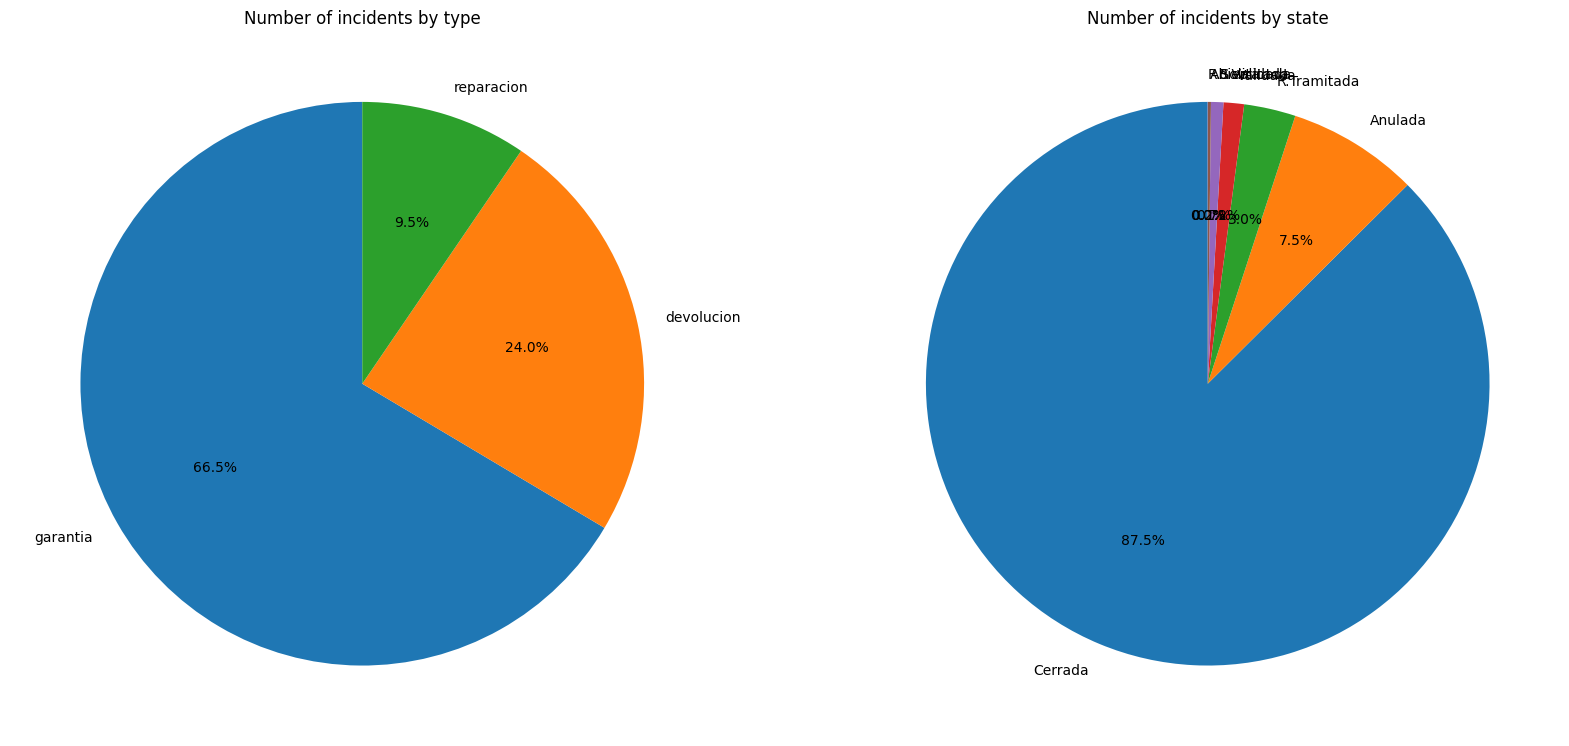

In [10]:
group_inc_tipo = (
    dataset_incidencias.groupby("titulo_es_tipo")
    .size()
    .to_frame()
    .rename(columns={0: "count"})
    .sort_values("count", ascending=False)
)
group_inc_estado = (
    dataset_incidencias.groupby("titulo_es")
    .size()
    .to_frame()
    .rename(columns={0: "count"})
    .sort_values("count", ascending=False)
)

# Create a subplot and plot both graphs in the same figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].pie(
    group_inc_tipo["count"],
    labels=group_inc_tipo.index,
    autopct="%1.1f%%",
    startangle=90,
)
axs[0].set_title("Number of incidents by type")
axs[1].pie(
    group_inc_estado["count"],
    labels=group_inc_estado.index,
    autopct="%1.1f%%",
    startangle=90,
)
axs[1].set_title("Number of incidents by state")
plt.show()

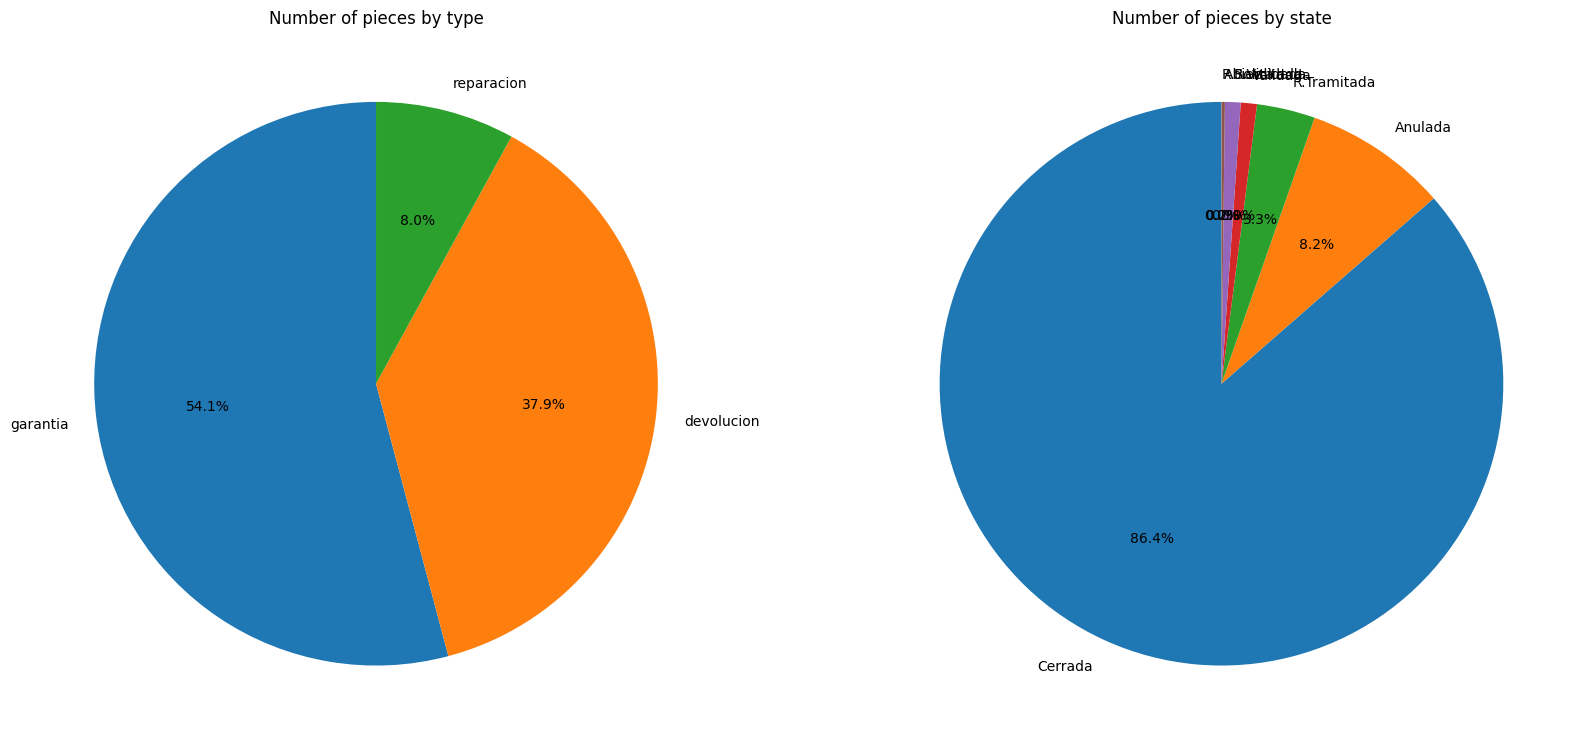

In [11]:
group_pieces_tipo = (
    dataset.groupby("titulo_es_tipo")
    .size()
    .to_frame()
    .rename(columns={0: "count"})
    .sort_values("count", ascending=False)
)
group_pieces_estado = (
    dataset.groupby("titulo_es")
    .size()
    .to_frame()
    .rename(columns={0: "count"})
    .sort_values("count", ascending=False)
)

# Create a subplot and plot both graphs in the same figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].pie(
    group_pieces_tipo["count"],
    labels=group_pieces_tipo.index,
    autopct="%1.1f%%",
    startangle=90,
)
axs[0].set_title("Number of pieces by type")
axs[1].pie(
    group_pieces_estado["count"],
    labels=group_pieces_estado.index,
    autopct="%1.1f%%",
    startangle=90,
)
axs[1].set_title("Number of pieces by state")
plt.show()

In [17]:
# Plot the X products with more incidents
X = 20
group_articulo = (
    clean_dataset.groupby("cod_articulo")
    .size()
    .to_frame()
    .rename(columns={0: "count"})
    .sort_values("count", ascending=False)
    .head(X)
)
group_articulo["cumsum"] = group_articulo["count"].cumsum()
group_articulo["%"] = (
    group_articulo["cumsum"] / dataset.groupby("cod_articulo").size().sum() * 100
)

# Plot the number of incidents
plt.figure(figsize=(20, 6))
plt.bar(group_articulo.index, group_articulo["count"], zorder=2)
plt.ylabel("Number of incidents")
plt.xlabel("Product")
plt.grid(zorder=0)
plt.xticks(rotation=90)

# Plot the % of total
plt.twinx()
plt.plot(group_articulo.index, group_articulo["%"], color="red", marker="o", zorder=3)
for i in range(X):
    plt.text(
        group_articulo.index[i],
        group_articulo["%"].iloc[i],
        f"{group_articulo['%'].iloc[i]:.2f}%",
        ha="center",
        va="bottom",
    )
plt.title(f"Top {X} products with more incidents")
plt.grid(False)
plt.ylabel("% of total")
plt.show()

# Data preprocessing (Translating the text fields)

In [12]:
from deep_translator import GoogleTranslator
from langdetect import detect
from langdetect import DetectorFactory

DetectorFactory.seed = 0

In [13]:
fields_to_translate = ["desc_problema", "problema", "descripcion"]
text_to_translate = {}

# text_to_translate = clean_dataset[fields_to_translate]
for field in fields_to_translate:
    text_to_translate[field] = pd.DataFrame(
        clean_dataset[field].unique(), columns=[field]
    )

In [16]:
for key, values in text_to_translate.items():
    print(f"{key}: {values.shape}")

desc_problema: (32064, 1)
problema: (34175, 1)
descripcion: (12953, 1)


In [17]:
text_to_translate["desc_problema"].sample(10)

,desc_problema
18702,problème télécommande azce6bluezerocb
30023,DOSSIER 240703575
7156,LE BLUEFACE EST ALIMENTE MAIS NE S'ALLUME PAS
27206,TICKET 240104418-
29836,Carte ne marche pas communication de reseaux
13468,ticket 28032 Pièce a commander : AZX6QADAPT3FU2
8410,HEMOS CAMBIADO MOTOR DE LA REJILLA Y SIGUE SIN...
18279,numero de dossier 61713 vue avec la société vi...
8861,los mando no fonctionna
30245,Problème registre motorisé


In [18]:
# Detect language of the texts
def detect_language(text):
    if len(str(text)) < 5:
        return "Too short"

    try:
        return "es" if str(text) == "" else detect(str(text).lower())
    except Exception as e:
        return "Error"


for field in fields_to_translate:
    text_to_translate[field][f"{field}_lg"] = text_to_translate[field][field].apply(
        detect_language
    )

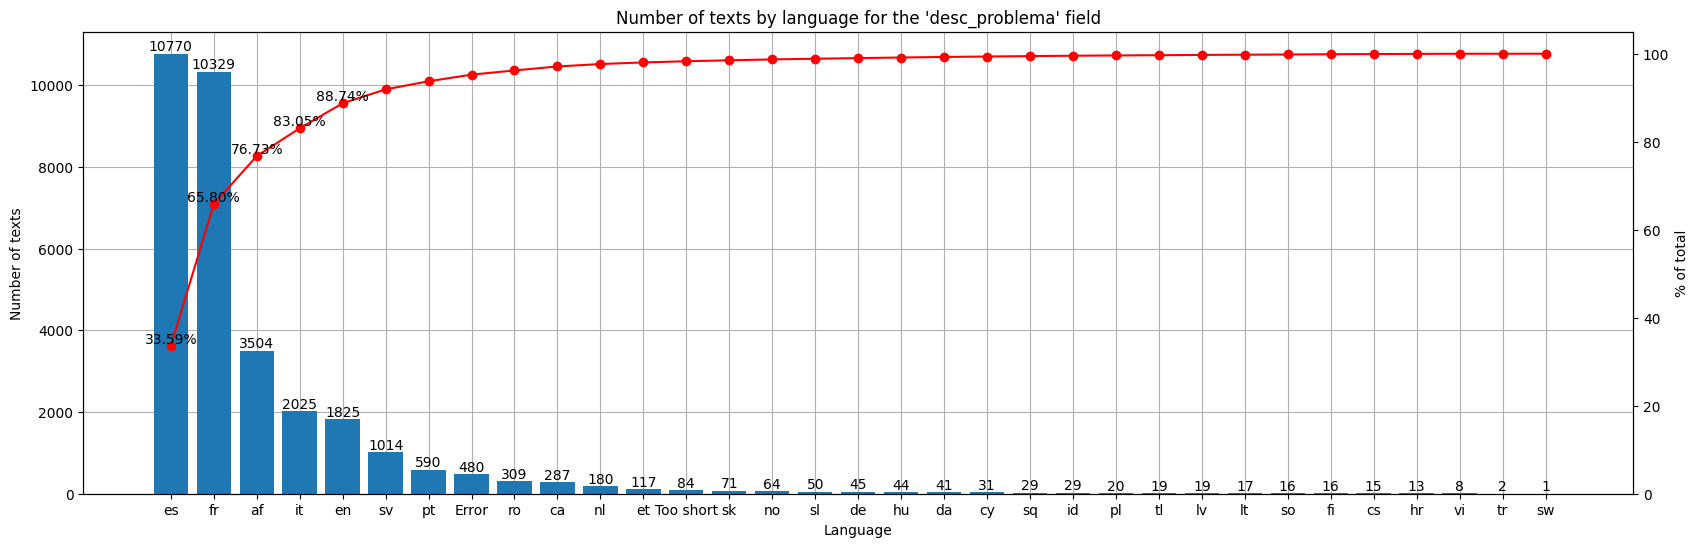

In [19]:
# Plot the number of texts by language
lang = text_to_translate["desc_problema"]["desc_problema_lg"].value_counts()
plt.figure(figsize=(20, 6))
plt.bar(lang.index, lang.values, zorder=2)
for i in range(len(lang)):
    plt.text(
        lang.index[i],
        lang.values[i],
        lang.values[i],
        ha="center",
        va="bottom",
        zorder=2,
    )
plt.ylabel("Number of texts")
plt.xlabel("Language")
plt.title("Number of texts by language for the 'desc_problema' field")
plt.grid(zorder=0)
plt.twinx()
plt.plot(
    lang.index, lang.cumsum() / lang.sum() * 100, color="red", marker="o", zorder=2
)
plt.grid(False)
for i in range(5):
    plt.text(
        lang.index[i],
        lang.cumsum().iloc[i] / lang.sum() * 100,
        f"{lang.cumsum().iloc[i] / lang.sum() * 100:.2f}%",
        ha="center",
        va="bottom",
        zorder=2,
    )
plt.ylabel("% of total")
plt.ylim(0, 105)
plt.show()

In [20]:
aux = 0
for text in text_to_translate.keys():
    print(
        f"Lenght of filtered dataframe: {len(text_to_translate[text][~text_to_translate[text][f'{text}_lg'].isin(['es','Error','Too short'])])}"
    )
    aux += (
        text_to_translate[text][
            ~text_to_translate[text][f"{text}_lg"].isin(["es", "Error", "Too short"])
        ][text]
        .apply(lambda x: len(str(x)))
        .sum()
    )
print(f"Total number of characters to translate: {aux}")

Lenght of filtered dataframe: 20730
Lenght of filtered dataframe: 22397
Lenght of filtered dataframe: 10581
Total number of characters to translate: 2431462


In [21]:
# Save in disk the text to translate dictionary to avoid reprocessing
for text in text_to_translate.keys():
    text_to_translate[text].to_csv(
        f"../DATA/{text}.csv", sep="¬", encoding="utf-8-sig", index=False
    )

In [22]:
# Load from disk the text to translate dictionary
text_to_translate = {}
for text in fields_to_translate:
    text_to_translate[text] = pd.read_csv(
        f"../DATA/{text}.csv", sep="¬", encoding="utf-8-sig"
    )

C:\Users\voliveira\AppData\Local\Temp\ipykernel_24220\468575796.py:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  text_to_translate[text] = pd.read_csv(
C:\Users\voliveira\AppData\Local\Temp\ipykernel_24220\468575796.py:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  text_to_translate[text] = pd.read_csv(
C:\Users\voliveira\AppData\Local\Temp\ipykernel_24220\468575796.py:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  text_to_translate[text] = pd.read_csv(


In [24]:
from tqdm import tqdm


def translate_in_batches(df, columns_to_translate, batch_size=10):
    """
    Function to translate the text in batches.
    It uses the Google Translator API to translate the text.
    It writes the translated text to a csv file.
    :param df: dataframe with the text to translate
    :param columns_to_translate: columns to translate
    :param batch_size: size of the batch to translate
    :return: None
    """
    for column in columns_to_translate:
        total_rows = len(df)
        with tqdm(total=total_rows) as pbar:
            for i in range(0, total_rows, batch_size):
                batch = df.iloc[i : i + batch_size][column].tolist()
                try:
                    translations = GoogleTranslator(
                        source="auto", target="es"
                    ).translate_batch(batch)
                    # Test if csv file exists, if not created it and add the translated text to it
                    if not os.path.exists(f"{column}_trasnlated.csv"):
                        pd.DataFrame(
                            {column: batch, f"{column}_translated": translations}
                        ).to_csv(
                            f"../DATA/{column}_translated.csv",
                            mode="a",
                            index=False,
                            sep="¬",
                            encoding="utf-8-sig",
                            lineterminator="\n",
                        )
                    else:
                        pd.DataFrame(
                            {column: batch, f"{column}_translated": translations}
                        ).to_csv(
                            f"../DATA/{column}_translated.csv",
                            mode="a",
                            header=False,
                            index=False,
                            sep="¬",
                            encoding="utf-8-sig",
                            lineterminator="\n",
                        )
                    pbar.update(len(batch))
                except Exception as e:
                    print(f"Error occurred during translation: {e}")

In [25]:
# Translate texts that are not spanish text
for text in text_to_translate.keys():
    translate_in_batches(
        text_to_translate[text][
            ~text_to_translate[text][f"{text}_lg"].isin(["es", "Error", "Too short"])
        ],
        [text],
    )

  1%|          | 150/20730 [01:37<3:43:01,  1.54it/s]


KeyboardInterrupt: 

### The analysis will continue in the notebook MyZone-DefectClassification